**This is Robbie's Notebook concerning the crime rate data for Pittsburgh neighborhoods.**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("pittsburgh-police-arrest-data.csv")
data = data.sort_values("INCIDENTNEIGHBORHOOD")
currNeighborhood = "-"
count = 0
index = 0
neighborhoods = []
incidents = []
for row in data.iterrows():
    moddata = str(data.iloc[index, 9])
    if currNeighborhood == "-":
        currNeighborhood = moddata
        neighborhoods.append(currNeighborhood)
    elif currNeighborhood == "nan": # Some data did not have a neighborhood input. Therefore, this data was discarded.
        incidents.append(count)
        break
    elif currNeighborhood != moddata:
        incidents.append(count)
        count = 0
        currNeighborhood = moddata
        neighborhoods.append(currNeighborhood)
    count = count + 1
    index = index + 1
incidentsPerNeighborhood = pd.DataFrame(incidents, index = neighborhoods, columns = ['Incidents'])
incidentsPerNeighborhood.head(25)

,Incidents
Allegheny Center,864
Allegheny West,92
Allentown,689
Arlington,209
Arlington Heights,111
Banksville,204
Bedford Dwellings,458
Beechview,906
Beltzhoover,381
Bloomfield,723


In [3]:
data = pd.read_csv("population-density.csv")
index = 0
neighborhoods = []
populations = []
# populationPerNeighborhood = pd.DataFrame([], columns = ['Neighborhood', 'Population'])
for row in data.iterrows():
    neighborhoods.append(str(data.iloc[index, 0]))
    populations.append(data.iloc[index, 9])
    # temp = pd.DataFrame([[currNeighborhood, val]], columns = ['Neighborhood', 'Population'])
    index = index + 1
populationPerNeighborhood = pd.DataFrame(populations, index = neighborhoods, columns = ['Population'])
populationPerNeighborhood.head(25)

,Population
Allegheny Center,933
Allegheny West,462
Allentown,2500
Arlington,1869
Arlington Heights,244
Banksville,4144
Bedford Dwellings,1202
Beechview,7974
Beltzhoover,1925
Bloomfield,8442


In [4]:
bigDataFrame = incidentsPerNeighborhood.merge(populationPerNeighborhood, left_index=True, right_index=True)
bigDataFrame

,Incidents,Population
Allegheny Center,864,933
Allegheny West,92,462
Allentown,689,2500
Arlington,209,1869
Arlington Heights,111,244
...,...,...
Upper Lawrenceville,148,2669
West End,198,254
West Oakland,225,2604
Westwood,158,3066


<AxesSubplot:xlabel='Population', ylabel='Incidents'>

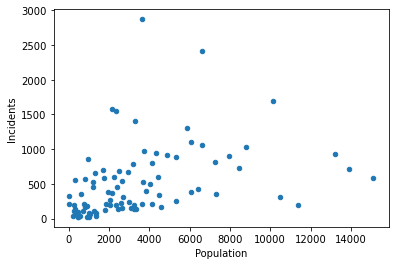

In [5]:
bigDataFrame.plot.scatter(x="Population", y="Incidents")

In [7]:
# inc = bigDataFrame.iloc[0, 0]
# pop = bigDataFrame.iloc[0, 1]
# print(inc)
# print(pop)
# print(float(inc)/float(pop))
index = 0
incidentsPerCapita = []
for row in bigDataFrame.iterrows():
    ipc = float(bigDataFrame.iloc[index, 0])/float(bigDataFrame.iloc[index, 1])
    incidentsPerCapita.append(ipc)
    index = index + 1
bigDataFrame['Incidents Per Capita'] = incidentsPerCapita
bigDataFrame

,Incidents,Population,Incidents Per Capita
Allegheny Center,864,933,0.926045
Allegheny West,92,462,0.199134
Allentown,689,2500,0.275600
Arlington,209,1869,0.111825
Arlington Heights,111,244,0.454918
...,...,...,...
Upper Lawrenceville,148,2669,0.055451
West End,198,254,0.779528
West Oakland,225,2604,0.086406
Westwood,158,3066,0.051533


In [9]:
bigDataFrame = bigDataFrame.sort_values("Incidents Per Capita")
bigDataFrame.head(10)

,Incidents,Population,Incidents Per Capita
Squirrel Hill North,197,11363,0.017337
Swisshelm Park,30,1361,0.022043
Regent Square,23,928,0.024784
New Homestead,27,990,0.027273
North Oakland,308,10501,0.029331
Stanton Heights,172,4601,0.037383
Squirrel Hill South,587,15110,0.038848
Lincoln Place,137,3227,0.042454
Morningside,143,3346,0.042738
Point Breeze,249,5315,0.046849
